In [1]:
import numpy as np

In [2]:
class Linear_Regression():

   def __init__( self, learning_rate, no_of_iterations ) :
          
        self.learning_rate = learning_rate
          
        self.no_of_iterations = no_of_iterations

    # fit function to train the model

   def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # initiating the weight and bias
          
        self.w = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y


        # implementing Gradient Descent for Optimization
                  
        for i in range( self.no_of_iterations ) :
              
            self.update_weights()
              
        
      
    # function to update weights in gradient descent
      
   def update_weights( self ) :
             
        Y_prediction = self.predict( self.X )
          
        # calculate gradients  
      
        dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m
       
        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m 
          
        # updating the weights
      
        self.w = self.w - self.learning_rate * dw
      
        self.b = self.b - self.learning_rate * db
          
      
    # Line function for prediction:
      
   def predict( self, X ) :
      
        return X.dot( self.w ) + self.b

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as plt

In [4]:
df = pd.read_csv("D:/Dataset for ML/salary_data.csv")

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
df.shape

(30, 2)

In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
x = df.drop(columns='Salary')
y = df['Salary']

In [9]:
print(x)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [10]:
print(y)

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [12]:
print(x.shape,x_train.shape,x_test.shape)

(30, 1) (24, 1) (6, 1)


In [13]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [15]:
model.fit(x_train,y_train)

In [18]:
train_pred = model.predict(x_train)

In [19]:
test_pred = model.predict(x_test)

In [20]:
print(test_pred)

27    115791.143219
15     71497.676037
23    102597.344484
17     75267.332819
8      55476.634716
9      60188.705693
dtype: float64


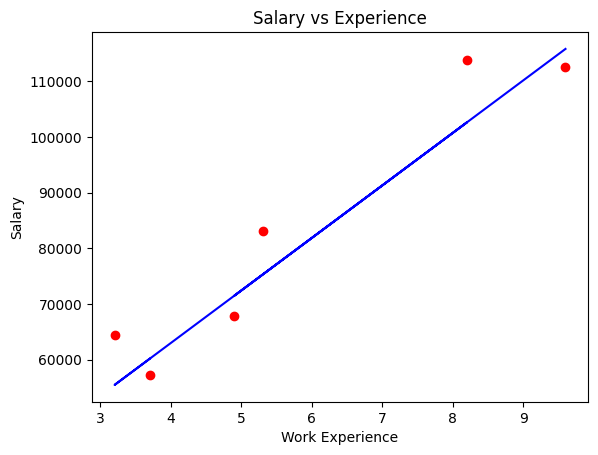

In [27]:
# Scatter plot of actual data
plt.scatter(x_test, y_test, color='red')

# Line plot of predicted values
plt.plot(x_test, test_pred, color='blue')

# Labels and title
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')

# Show the plot
plt.show()
